In [10]:
print('hello')

hello


In [11]:
!pip install python-dotenv

import os
from dotenv import load_dotenv
import requests
import pandas as pd

In [12]:
load_dotenv()
API_KEY = os.getenv("API_KEY")

In [13]:
url = "https://gateway.thegraph.com/api/subgraphs/id/5zvR82QoaXYFyDEKLZ9t6v9adgnptxYpKpSbxtgVENFV"

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

# fetch top 1000 pools based on Volume (in USD) in Desc. order 
query = """
{
  pools(first: 1000, orderBy: volumeUSD, orderDirection: desc) {
    id
    token0 { symbol }
    token1 { symbol }
    feeTier
    volumeUSD
    totalValueLockedUSD
    token0Price
    token1Price
  }
}
"""

In [14]:

response = requests.post(url, json={"query": query}, headers=headers)
print(response.json())

{'data': {'pools': [{'feeTier': '500', 'id': '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640', 'token0': {'symbol': 'USDC'}, 'token0Price': '1470.805081462323888928571819680618', 'token1': {'symbol': 'WETH'}, 'token1Price': '0.0006798997451149450480834406737692959', 'totalValueLockedUSD': '331357581.5148106492468435956170674', 'volumeUSD': '550489571350.3370197487228449723638'}, {'feeTier': '500', 'id': '0x11b815efb8f581194ae79006d24e0d814b7697f6', 'token0': {'symbol': 'WETH'}, 'token0Price': '0.0006794570935512450048818991960354633', 'token1': {'symbol': 'USDT'}, 'token1Price': '1471.763279081255899168092315377131', 'totalValueLockedUSD': '60849841.23850175829391081927845663', 'volumeUSD': '119578316184.2202369744374338270036'}, {'feeTier': '100', 'id': '0x3416cf6c708da44db2624d63ea0aaef7113527c6', 'token0': {'symbol': 'USDC'}, 'token0Price': '0.9990577310599268020645307198879425', 'token1': {'symbol': 'USDT'}, 'token1Price': '1.000943157648230718224398695503111', 'totalValueLockedUSD': '

In [15]:
response = requests.post(url, json={"query": query}, headers=headers)
data = response.json()

# Extract pool data
pools = data["data"]["pools"]

# Normalize nested token symbols into flat fields
clean_data = []
for pool in pools:
    clean_data.append({
        "id": pool["id"],
        "token0": pool["token0"]["symbol"],
        "token1": pool["token1"]["symbol"],
        "feeTier": pool["feeTier"],
        "volumeUSD": pool["volumeUSD"],
        "totalValueLockedUSD": pool["totalValueLockedUSD"],
        "token0Price": pool["token0Price"],
        "token1Price": pool["token1Price"]
    })

In [16]:
# Load into DataFrame
df = pd.DataFrame(clean_data)

# Convert numeric columns
numeric_fields = ["volumeUSD", "totalValueLockedUSD", "token0Price", "token1Price", "feeTier"]
df[numeric_fields] = df[numeric_fields].astype(float)

# Optional: sort by volume
df = df.sort_values(by="volumeUSD", ascending=False)

# Show the result
df.head(5)

,id,token0,token1,feeTier,volumeUSD,totalValueLockedUSD,token0Price,token1Price
0,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,USDC,WETH,500.0,5.504865e+11,3.313767e+08,1470.805081,0.000680
1,0x11b815efb8f581194ae79006d24e0d814b7697f6,WETH,USDT,500.0,1.195783e+11,6.085535e+07,0.000679,1471.763279
2,0x3416cf6c708da44db2624d63ea0aaef7113527c6,USDC,USDT,100.0,9.793214e+10,4.491304e+07,0.999058,1.000943
3,0x4585fe77225b41b697c938b018e2ac67ac5a20c0,WBTC,WETH,500.0,8.677259e+10,7.920803e+07,0.019131,52.270361
4,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,USDC,WETH,3000.0,8.308687e+10,2.360727e+08,1474.736487,0.000678


In [17]:
df.shape

(1000, 8)

In [18]:
import pandas as pd

# Combine token0 and token1 into a single Series
all_tokens = pd.concat([df['token0'], df['token1']])

# Count appearances of each token
token_counts = all_tokens.value_counts()

# Show top tokens
print(token_counts.head(10))

WETH    727
USDC    159
USDT     75
WBTC     38
DAI      23
FEI       9
UST       8
UNI       8
FRAX      6
FUN       6
Name: count, dtype: int64


/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_32929/3573981057.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=token_counts.head(top_n).values, y=token_counts.head(top_n).index, palette="viridis")


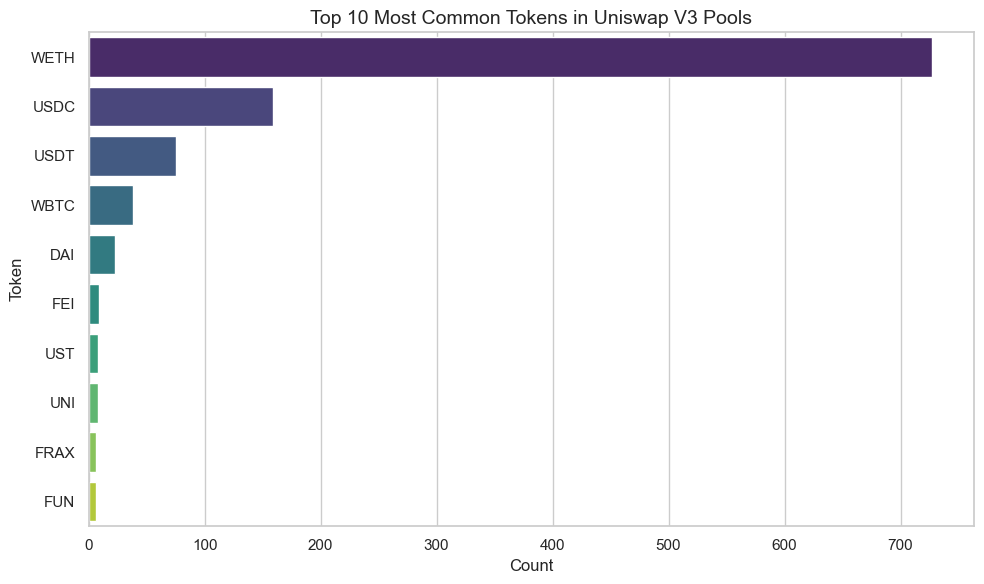

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set style
sns.set(style="whitegrid")

# Plot top 10 tokens
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x=token_counts.head(top_n).values, y=token_counts.head(top_n).index, palette="viridis")

plt.title(f"Top {top_n} Most Common Tokens in Uniswap V3 Pools", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Token")
plt.tight_layout()
plt.show()

In [20]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1000 non-null   object 
 1   token0               1000 non-null   object 
 2   token1               1000 non-null   object 
 3   feeTier              1000 non-null   float64
 4   volumeUSD            1000 non-null   float64
 5   totalValueLockedUSD  1000 non-null   float64
 6   token0Price          1000 non-null   float64
 7   token1Price          1000 non-null   float64
dtypes: float64(5), object(3)
memory usage: 62.6+ KB
None
            feeTier     volumeUSD  totalValueLockedUSD   token0Price  \
count   1000.000000  1.000000e+03         1.000000e+03  1.000000e+03   
mean    5590.100000  1.593657e+09         2.750514e+06  3.437648e+49   
std     3926.730345  1.870378e+10         1.742981e+07  1.076029e+51   
min      100.000000  2.683359e+07         2.25369

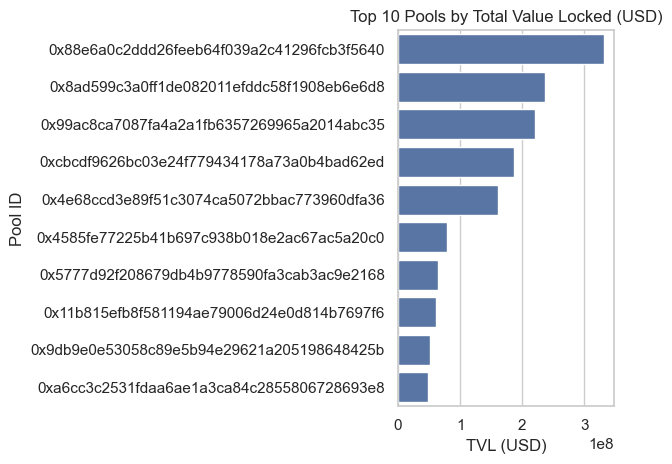

In [22]:
top_liquidity = df.sort_values("totalValueLockedUSD", ascending=False).head(10)
sns.barplot(x="totalValueLockedUSD", y="id", data=top_liquidity)
plt.title("Top 10 Pools by Total Value Locked (USD)")
plt.xlabel("TVL (USD)")
plt.ylabel("Pool ID")
plt.tight_layout()
plt.show()

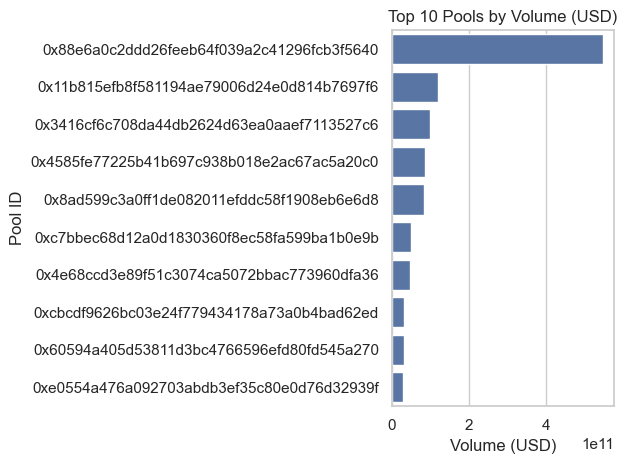

In [23]:
top_volume = df.sort_values("volumeUSD", ascending=False).head(10)
sns.barplot(x="volumeUSD", y="id", data=top_volume)
plt.title("Top 10 Pools by Volume (USD)")
plt.xlabel("Volume (USD)")
plt.ylabel("Pool ID")
plt.tight_layout()
plt.show()

/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_32929/117303876.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="feeTier", data=df, palette="pastel")


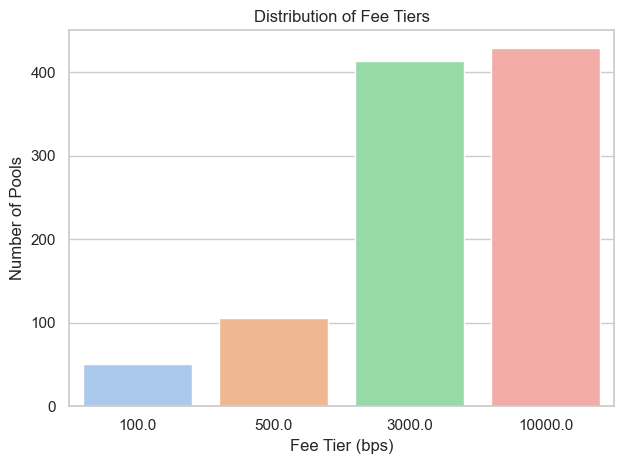

In [24]:
sns.countplot(x="feeTier", data=df, palette="pastel")
plt.title("Distribution of Fee Tiers")
plt.xlabel("Fee Tier (bps)")
plt.ylabel("Number of Pools")
plt.tight_layout()
plt.show()

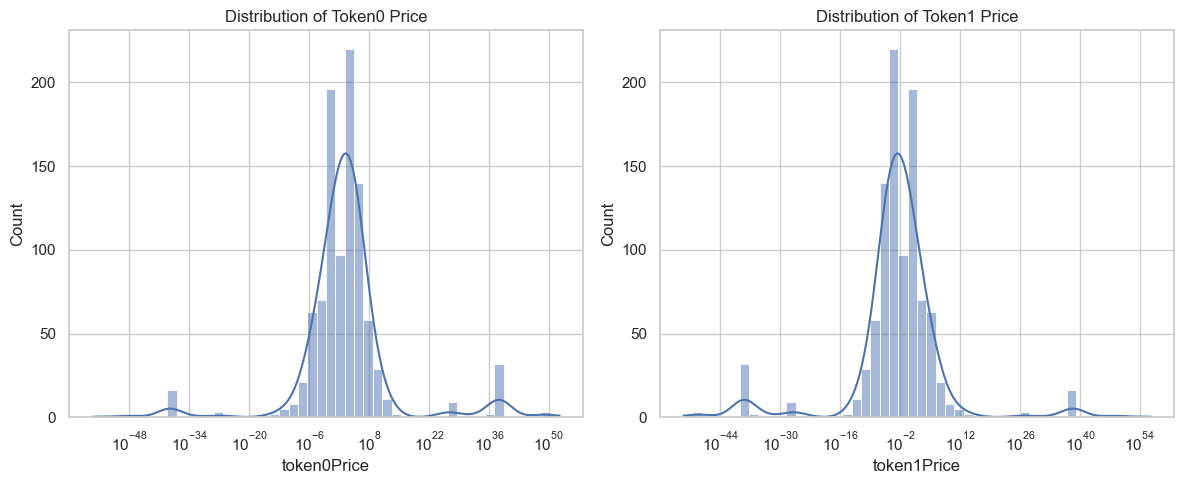

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["token0Price"], bins=50, kde=True, log_scale=True)
plt.title("Distribution of Token0 Price")

plt.subplot(1, 2, 2)
sns.histplot(df["token1Price"], bins=50, kde=True, log_scale=True)
plt.title("Distribution of Token1 Price")

plt.tight_layout()
plt.show()

In [ ]:
# finding pools with high-volume BUT low-fees
df_filtered = df[(df["feeTier"] <= 500) & (df["volumeUSD"] > 1e9)]
df_filtered.sort_values("volumeUSD", ascending=False).head()

,id,token0,token1,feeTier,volumeUSD,totalValueLockedUSD,token0Price,token1Price
0,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,USDC,WETH,500.0,5.504865e+11,3.313767e+08,1470.805081,0.000680
1,0x11b815efb8f581194ae79006d24e0d814b7697f6,WETH,USDT,500.0,1.195783e+11,6.085535e+07,0.000679,1471.763279
2,0x3416cf6c708da44db2624d63ea0aaef7113527c6,USDC,USDT,100.0,9.793214e+10,4.491304e+07,0.999058,1.000943
3,0x4585fe77225b41b697c938b018e2ac67ac5a20c0,WBTC,WETH,500.0,8.677259e+10,7.920803e+07,0.019131,52.270361
5,0xc7bbec68d12a0d1830360f8ec58fa599ba1b0e9b,WETH,USDT,100.0,4.938383e+10,6.534894e+06,0.000679,1472.433359


In [32]:
query = """
{
  swaps(first: 1000, orderBy: amountUSD, orderDirection: desc) {
    amountUSD
    sender
    recipient
    token0 {
      symbol
    }
    token1 {
      symbol
    }
    timestamp
    pool {
      id
    }
  }
}
"""

In [33]:
response = requests.post(url, json={"query": query}, headers=headers)

# Check if response is OK
if response.status_code != 200:
    print(response.text)
else:
    data = response.json()
    swaps_data = data['data']['swaps'] 

In [34]:
import pandas as pd

df_swaps = pd.DataFrame(swaps_data)

# Convert numeric fields
df_swaps["amountUSD"] = df_swaps["amountUSD"].astype(float)

# Optional: Convert timestamp to datetime
df_swaps["timestamp"] = pd.to_datetime(df_swaps["timestamp"], unit="s")

/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_32929/1619908237.py:9: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_swaps["timestamp"] = pd.to_datetime(df_swaps["timestamp"], unit="s")


In [36]:
df_swaps.head()

,amountUSD,pool,recipient,sender,timestamp,token0,token1
0,8.956745e+07,{'id': '0x6c6bc977e13df9b0de53b251522280bb7238...,0xd8c07491caa1edf960db3ceff387426d53942ea0,0xd8c07491caa1edf960db3ceff387426d53942ea0,2023-03-11 23:33:47,{'symbol': 'DAI'},{'symbol': 'USDC'}
1,6.253341e+07,{'id': '0x5777d92f208679db4b9778590fa3cab3ac9e...,0x9dd864d39fbfdf7648402746263e451cd4f36af0,0x9dd864d39fbfdf7648402746263e451cd4f36af0,2023-03-11 23:33:59,{'symbol': 'DAI'},{'symbol': 'USDC'}
2,5.399468e+07,{'id': '0x5777d92f208679db4b9778590fa3cab3ac9e...,0xdef171fe48cf0115b1d80b88dc8eab59176fee57,0xe592427a0aece92de3edee1f18e0157c05861564,2022-03-08 09:43:25,{'symbol': 'DAI'},{'symbol': 'USDC'}
3,5.375413e+07,{'id': '0x5777d92f208679db4b9778590fa3cab3ac9e...,0x00000000000747d525e898424e8774f7eb317d00,0x00000000000747d525e898424e8774f7eb317d00,2023-03-11 23:34:11,{'symbol': 'DAI'},{'symbol': 'USDC'}
4,4.799517e+07,{'id': '0x3416cf6c708da44db2624d63ea0aaef71135...,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,2022-01-22 11:28:22,{'symbol': 'USDC'},{'symbol': 'USDT'}


In [ ]:
# Filter large swaps (> $1M)
whales = df_swaps[df_swaps["amountUSD"] > 1_000_000]

# Top whale wallets
top_whales = whales["sender"].value_counts().head(10)
print(top_whales)

sender
0xe592427a0aece92de3edee1f18e0157c05861564    215
0x05656db19ec9ff8dfb437475b3d76ca9a29e968f     74
0x220bda5c8994804ac96ebe4df184d25e5c2196d4     59
0xa69babef1ca67a37ffaf7a485dfff3382056e78c     56
0x00000000032962b51589768828ad878876299e14     52
0xeae695ba71f0f8206c7eaf26bd66ae1b8423950c     35
0xe37e799d5077682fa0a244d46e5649f71457bd09     31
0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45     30
0x36c219ff7ab5fb88c3d77e778da20dc9629ad752     30
0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b     24
Name: count, dtype: int64


In [38]:
# Filter out known contracts/aggregators (example using Uniswap's router)
router_addresses = [
    "0xe592427a0aece92de3edee1f18e0157c05861564",  # Uniswap V3 Router
    "0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45",  # Uniswap Universal Router
]

# Whales excluding known routers
real_whales = whales[~whales["sender"].isin(router_addresses)]

# Top whale addresses (non-router)
top_real_whales = real_whales["sender"].value_counts().head(10)
print(top_real_whales)

sender
0x05656db19ec9ff8dfb437475b3d76ca9a29e968f    74
0x220bda5c8994804ac96ebe4df184d25e5c2196d4    59
0xa69babef1ca67a37ffaf7a485dfff3382056e78c    56
0x00000000032962b51589768828ad878876299e14    52
0xeae695ba71f0f8206c7eaf26bd66ae1b8423950c    35
0xe37e799d5077682fa0a244d46e5649f71457bd09    31
0x36c219ff7ab5fb88c3d77e778da20dc9629ad752    30
0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b    24
0xb03feb49877a85925f15b42388f22512976ed54d    22
0xf38be77ac9a0643ada22dec416eb3158598614bb    16
Name: count, dtype: int64


but we're seeing all-time swap count. I realised this only after i looked up Etherscan, checked the 1st person's transactions and this was what i found:

- eth balance is 0
- no mathching entries BUT -- 1 internal transaction & >10 token transfers found (is surely a bot/arbitrage wallet)
- last transaction was 225 days ago


Now, we need a filter for ACTIVE wallets


In [39]:
query = """
{
  swaps(first: 1000, orderBy: amountUSD, orderDirection: desc, where: { timestamp_gt: 1710700000 }) {
    sender
    amountUSD
    timestamp
  }
}
"""

In [41]:
# Convert timestamp to datetime
df_swaps["timestamp"] = pd.to_datetime(df_swaps["timestamp"], unit='s')

# Filter to last 30 days
recent_swaps = df_swaps[df_swaps["timestamp"] >= pd.Timestamp.now() - pd.Timedelta(days=30)]

# Now redo the sender value counts
active_whales = recent_swaps["sender"].value_counts()

In [42]:
# Step 1: Count swap activity by wallet address (sender)
active_whales = recent_swaps["sender"].value_counts().head(10)

# Step 2: Print the result nicely
print("Top Active Wallets (Past 30 Days):\n")
print(active_whales)

Top Active Wallets (Past 30 Days):

sender
0x3bfe65f217df9ad7358698580aeb47f692241c48    12
0x7f9b6bb65c8f9105f46ec3b18cb31845c85b6e72     2
Name: count, dtype: int64


checked the 1st person's profile on Etherscan:
- has >10 internal transfers + >10 token transfers
- last transaction ~2 hrs ago

is definitely an active account, likely a smart contract/DeFi bot

update: checked "contract" tab on Etherscan for this person's wallet address:
- code found + "Note: We also found another 1 contract with exact matching byte codes"

Now, we're sure this is a DeFi bot/automated trading contracts